# Tabla de contenido
1. [Introducción al Proyecto](#Introduccción-al-Proyecto)
2. [Objetivos específicos](#Objetivos-específicos)
3. [Etapas de análisis del proyecto](#Etapas-de-análisis-del-proyecto)
4. [Acceso y preparación de datos](#Acceso-y-preparación-de-datos)
5. [Análisis exploratorio y cálculo de métricas](#Análisis-exploratorio-y-cálculo-de-métricas)
6. [Conclusión y recomendaciones](#Conclusión-y-recomendaciones) 

# Introducción al Proyecto

En el proyecto de análisis de datos para el departamento de analítica de la empresa Showz, el objetivo es optimizar los gastos de marketing utilizando datos de visitas al sitio web, pedidos y estadísticas de marketing. 

# Objetivos específicos


1. **Análisis del comportamiento del cliente**: Estudiar cómo los clientes utilizan el servicio y determinar patrones en su interacción con la plataforma, incluyendo cuándo y cómo realizan compras, para entender mejor su comportamiento.

2. **Evaluación de la rentabilidad del cliente**: Medir cuánto dinero genera cada cliente para la compañía a lo largo del tiempo, y analizar en qué momento los ingresos obtenidos cubren el costo de adquisición de los clientes.

3. **Optimización del presupuesto de marketing**: Investigar la eficiencia de las campañas de marketing en relación con las conversiones de clientes, identificando oportunidades para mejorar la asignación de recursos y reducir los costos de adquisición.

# Etapas de análisis del proyecto

**1. Acceso y preparación de datos**  
- **Descripción**: En esta etapa, se cargan y optimizan los datasets de visitas, pedidos y costos. Se verifica que cada columna tenga el tipo de dato adecuado para el análisis.
- **Acciones clave**: 
  - Almacenar los datasets en variables (`visits_log_us.csv`, `orders_log_us.csv`, `costs_us.csv`).
  - Verificar y corregir tipos de datos para cada columna, como fechas, números y cadenas.

**2. Análisis exploratorio y cálculo de métricas**  
- **Descripción**: En esta fase se analizan las visitas, ventas y gastos de marketing. Se calculan las métricas clave, se segmentan los datos por fuente de adquisición y se identifican patrones de comportamiento de los usuarios.
- **Acciones clave**: 
  - **Visitas**: Calcular usuarios activos por día, semana y mes; sesiones diarias; duración promedio de sesiones; y frecuencia de retorno de los usuarios.
  - **Ventas**: Analizar cuándo los usuarios comienzan a comprar, cuántos pedidos realizan, el tamaño promedio de compra y su valor para la compañía (LTV).
  - **Marketing**: Evaluar los gastos totales, el costo de adquisición de clientes (CAC) por fuente de adquisición y la rentabilidad de las inversiones (ROMI).
  - **Visualización**: Crear gráficos que muestren cómo varían estas métricas según diferentes dispositivos, fuentes de anuncios y en el tiempo.

**3. Conclusión y recomendaciones**  
- **Descripción**: Se elabora una conclusión final basada en los análisis realizados, ofreciendo recomendaciones específicas a los expertos de marketing sobre qué plataformas o fuentes de adquisición deberían priorizar y cómo asignar el presupuesto de manera efectiva.
- **Acciones clave**:
  - Analizar los resultados de las métricas calculadas para fundamentar las recomendaciones.
  - Identificar las fuentes de adquisición más efectivas en términos de CAC y ROMI.
  - Proponer estrategias de optimización para la inversión en marketing basadas en los datos.

# Acceso y preparación de datos

**Inicialización**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st
import numpy as np
from scipy import stats
import seaborn as sns

**Cargar y explorar los datos**

In [ ]:
visits = pd.read_csv('./datasets/visits_log_us.csv')

In [ ]:
orders = pd.read_csv('./datasets/orders_log_us.csv')

In [ ]:
costs = pd.read_csv('./datasets/costs_us.csv')

**visits**

In [ ]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [ ]:
visits.columns = visits.columns.str.replace(' ', '_')

In [ ]:
visits.columns = visits.columns.str.lower()

In [ ]:
print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [ ]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S' )

In [ ]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S' )

In [ ]:
print(visits.dtypes)

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object


In [ ]:
visits.describe()

,end_ts,source_id,start_ts,uid
count,359400,359400.000000,359400,3.594000e+05
mean,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19
std,NaN,1.917116,NaN,5.298433e+18


In [ ]:
print(visits['start_ts'].min())

2017-06-01 00:01:00


In [ ]:
print(visits['start_ts'].max())

2018-05-31 23:59:00


In [ ]:
print(visits['end_ts'].min())

2017-06-01 00:02:00


In [ ]:
print(visits['end_ts'].max())

2018-06-01 01:26:00


In [ ]:
visits.duplicated().sum()

0

In [ ]:
visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

**orders**

In [ ]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [ ]:
orders.columns = orders.columns.str.replace(' ', '_')

In [ ]:
orders.columns = orders.columns.str.lower()

In [ ]:
print(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [ ]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S' )

In [ ]:
print(orders.dtypes)

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object


In [ ]:
orders.describe()

,buy_ts,revenue,uid
count,50415,50415.000000,5.041500e+04
mean,2017-12-20 05:14:24.846176768,4.999647,9.098161e+18
min,2017-06-01 00:10:00,0.000000,3.135781e+14
25%,2017-10-13 17:28:00,1.220000,4.533567e+18
50%,2017-12-21 14:12:00,2.500000,9.102274e+18
75%,2018-03-02 16:10:00,4.890000,1.368290e+19
max,2018-06-01 00:02:00,2633.280000,1.844617e+19
std,NaN,21.818359,5.285742e+18


In [ ]:
print(orders['buy_ts'].min())

2017-06-01 00:10:00


In [ ]:
print(orders['buy_ts'].max())

2018-06-01 00:02:00


In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

**costs**

In [ ]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [ ]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d' )

In [ ]:
print(costs.dtypes)

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


In [ ]:
costs.describe()

,source_id,dt,costs
count,2542.000000,2542,2542.000000
mean,4.857199,2017-11-29 09:04:57.403619072,129.477427
min,1.000000,2017-06-01 00:00:00,0.540000
25%,2.000000,2017-08-30 00:00:00,21.945000
50%,4.000000,2017-11-29 00:00:00,77.295000
75%,9.000000,2018-02-28 00:00:00,170.065000
max,10.000000,2018-05-31 00:00:00,1788.280000
std,3.181581,NaN,156.296628


In [ ]:
print(costs['dt'].min())

2017-06-01 00:00:00


In [ ]:
print(costs['dt'].max())

2018-05-31 00:00:00


In [ ]:
costs.duplicated().sum()

0

In [ ]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

**Observaciones**
Se uniformaron los nombres de las columnas a minúsculas, se remplazaron los espacios vacíos' '  por '_' y en el caso de las columnas que tuvieran información de fecha se cambio su tipo de dato object por date time, se examinó si habían datos duplicados y nulos los cuales no se encontraron.

# Análisis exploratorio y cálculo de métricas

**Visitas**

¿Cuántas personas lo usan cada día, semana y mes?

In [ ]:
visits['date'] = visits['start_ts'].dt.date

In [ ]:
visits_per_day = visits.groupby('date')['uid'].nunique().sort_index()

In [ ]:
print(visits_per_day)

date
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64


In [ ]:
visits['week'] = visits['start_ts'].dt.isocalendar().week

In [ ]:
visits_per_week = visits.groupby('week')['uid'].nunique().sort_index()

In [ ]:
print(visits_per_week)

week
1      6918
2      6703
3      6972
4      7060
5      8111
6      7908
7      7759
8      7518
9      7395
10     6844
11     6225
12     7898
13     4940
14     5383
15     5494
16     5740
17     5503
18     3916
19     4128
20     5070
21     4995
22     6867
23     4129
24     2812
25     2878
26     3064
27     3294
28     4355
29     3841
30     2655
31     2364
32     2444
33     2746
34     3116
35     3694
36     4412
37     4319
38     4874
39     6241
40     7612
41     7074
42     7148
43     7401
44     7480
45     7179
46     8117
47    10586
48     8166
49     8407
50     8214
51     7172
52     7774
Name: uid, dtype: int64


In [ ]:
visits['month'] = visits['start_ts'].dt.month

In [ ]:
visits_per_month = visits.groupby('month')['uid'].nunique().sort_index()

In [ ]:
print(visits_per_month)

month
1     28716
2     28749
3     27473
4     21008
5     20701
6     13259
7     14183
8     11631
9     18975
10    29692
11    32797
12    31557
Name: uid, dtype: int64


In [ ]:
print('Promedio de visitas al día:', visits_per_day.mean())

Promedio de visitas al día: 907.9917582417582


In [ ]:
print('Promedio de visitas a la semana:', visits_per_week.mean())

Promedio de visitas a la semana: 5825.288461538462


In [ ]:
print('Promedio de visitas al mes:', visits_per_month.mean())

Promedio de visitas al mes: 23228.416666666668


[Text(0.5, 1.0, 'Visitas por mes'),
 Text(0.5, 0, 'mes'),
 Text(0, 0.5, 'usuarios')]

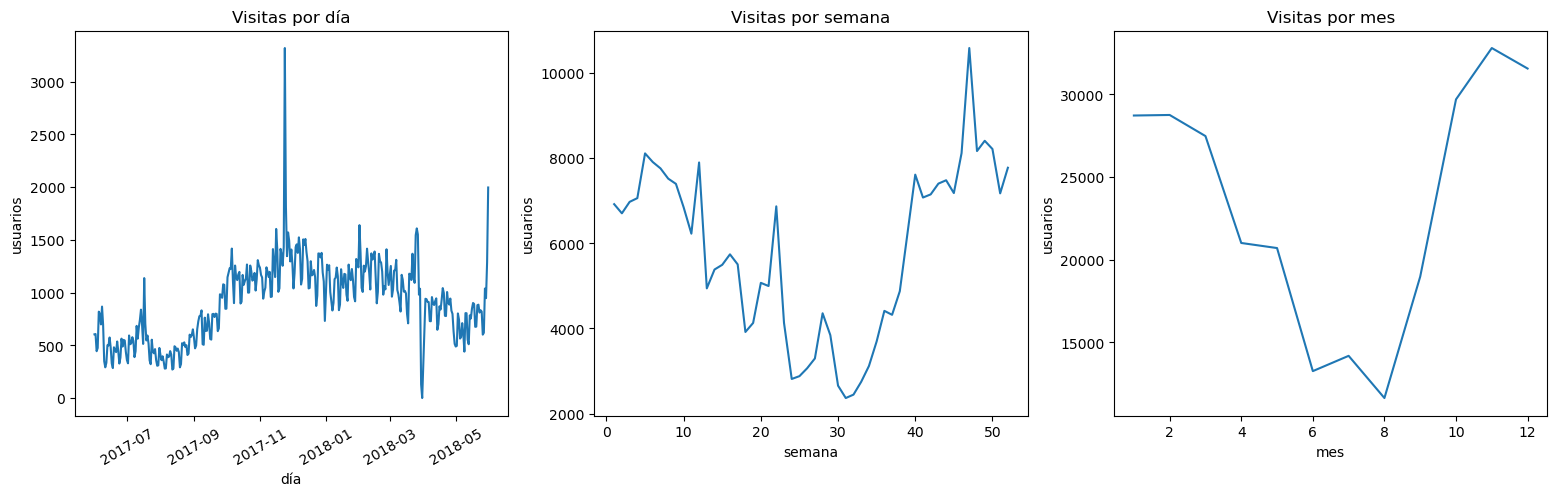

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(19, 5))

ax[0].plot(visits_per_day)
ax[0].set(title= 'Visitas por día', xlabel='día', ylabel='usuarios')
ax[0].tick_params(axis='x', rotation=30)
ax[1].plot(visits_per_week)
ax[1].set(title= 'Visitas por semana',xlabel='semana', ylabel='usuarios')
ax[2].plot(visits_per_month)
ax[2].set(title= 'Visitas por mes', xlabel='mes', ylabel='usuarios')


**Observaciones** Obtuvimos el promedio de visitas por día 908, por semana 5825 y por mes 23228, cuando gráficamos los resultados de las visitas notamos que un día se disparan las visitas y coicide con la fecha 24-11-2017 que fue 'Black Friday'. El comportamiento de visitas por semana y por mes son sumilares en el sentido que disminuyen a partir de oct, nov y dic del 2017 y empiezan a recuperarse en febrero del 2018.

¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [ ]:
sesiones_por_usuario = visits.groupby('date').agg({'uid':['count', 'nunique']})

In [ ]:
sesiones_por_usuario.columns = ['n_sesiones', 'n_usuarios']

In [ ]:
print(sesiones_por_usuario)

            n_sesiones  n_usuarios
date                              
2017-06-01         664         605
2017-06-02         658         608
2017-06-03         477         445
2017-06-04         510         476
2017-06-05         893         820
...                ...         ...
2018-05-27         672         620
2018-05-28        1156        1039
2018-05-29        1035         948
2018-05-30        1410        1289
2018-05-31        2256        1997

[364 rows x 2 columns]


In [ ]:
sesiones_por_usuario['sesion_por_usuario'] = sesiones_por_usuario['n_sesiones']/sesiones_por_usuario['n_usuarios']

In [ ]:
sesiones_por_usuario['sesion_por_usuario'].mean()

1.082169644003972

El promedio de sesiones por usuario al día es 1.0821

[Text(0.5, 1.0, 'Sesiones por usuario'),
 Text(0.5, 0, 'Fecha'),
 Text(0, 0.5, 'Cantidad de sesiones al día')]

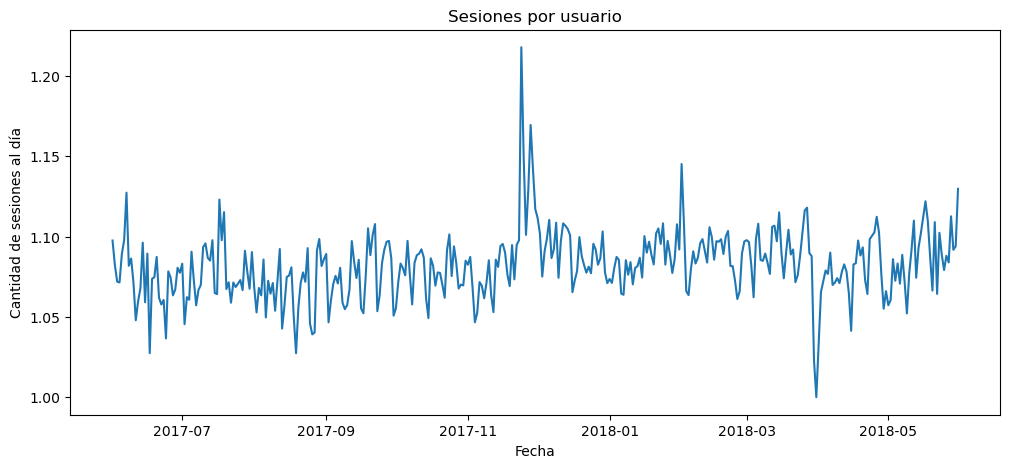

In [ ]:
plt.figure(figsize = (12, 5))
sesiones_por_usuario['sesion_por_usuario'].plot().set(title = 'Sesiones por usuario', xlabel='Fecha', ylabel='Cantidad de sesiones al día')

In [ ]:
print('El promedio de sesiones por usuario es de:', round(sesiones_por_usuario['sesion_por_usuario'].mean(), 2))

El promedio de sesiones por usuario es de: 1.08


In [ ]:
visits['day'] = visits['start_ts'].dt.date

In [ ]:
session_per_day = visits.groupby('day')['uid'].count()

In [ ]:
print(session_per_day)

day
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Name: uid, Length: 364, dtype: int64


In [ ]:
max_visits_date = session_per_day.idxmax()

In [ ]:
max_visits_count = session_per_day.max()

In [ ]:
print(f"La fecha con el mayor número de visitas fue {max_visits_date} con {max_visits_count} usuarios.")

La fecha con el mayor número de visitas fue 2017-11-24 con 4042 usuarios.


In [ ]:
min_visits_date = session_per_day.idxmin()

In [ ]:
min_visits_count = session_per_day.min()

In [ ]:
print(f"La fecha con el minímo número de visitas fue {min_visits_date} con {min_visits_count} usuarios.")

La fecha con el minímo número de visitas fue 2018-03-31 con 1 usuarios.


**Observaciones** La fecha con el mayor número de visitas 2017-11-24 con 4042 usuarios, coincide con ser el 'Black Friday' en USA, día donde hay muchas rebajas y descuentos por lo que el número de compras se dispara lo que coincide con el aumento de número de usuarios.

¿Cuál es la duración de cada sesión?

In [ ]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [ ]:
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

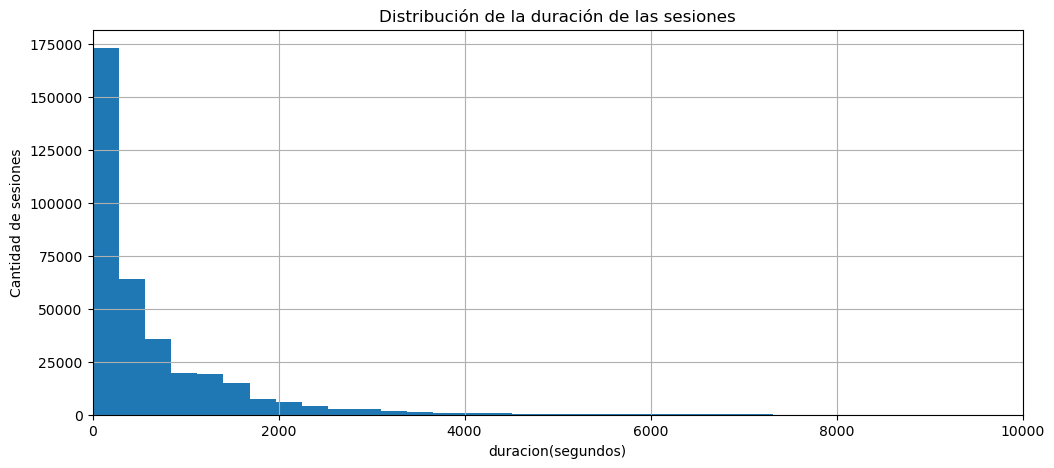

In [ ]:
plt.figure(figsize = (12, 5))
visits['session_duration'].hist(bins=300).set(title= 'Distribución de la duración de las sesiones', xlabel='duracion(segundos)', ylabel='Cantidad de sesiones')
plt.xlim(0,10000)
plt.show()

In [ ]:
print('El promedio de la duración de una sesión es de: ', round(visits['session_duration'].mean()/60)) 
print('La mediana de la duración de una sesión es de: ', round(visits['session_duration'].median()/60)) 
print('La moda de la duración de una sesión es de: ', round(visits['session_duration'].mode()[0]/60))



El promedio de la duración de una sesión es de:  11
La mediana de la duración de una sesión es de:  5
La moda de la duración de una sesión es de:  1


In [ ]:
print(visits.head(10))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid        date  week  month         day  session_duration  
0  16879256277535980062  2017-12-20    51     12  2017-12-20              1080  
1    104060357244891740  2018-02-19     8      2  2018-02-19              1680  
2   7459035603376831527  2017-07-01    26

In [ ]:
print('El promedio de la duración de la sesión:', visits['session_duration'].mean())

El promedio de la duración de la sesión: 643.506488592098


¿Con qué frecuencia los usuarios regresan? **RETENCION: si el cliente volvió a visitar el negocio después de la primera visita**

In [ ]:
primeras_visitas = visits.groupby('uid')['start_ts'].min().reset_index()

In [ ]:
primeras_visitas.columns = ['uid', 'primera_sesion_start_ts']

In [ ]:
primeras_visitas['primera_sesion_fecha'] = primeras_visitas['primera_sesion_start_ts'].dt.date 
primeras_visitas['primera_sesion_mes'] = primeras_visitas['primera_sesion_start_ts'].dt.month

In [ ]:
primeras_visitas.head()

,uid,primera_sesion_start_ts,primera_sesion_fecha,primera_sesion_mes
0,11863502262781,2018-03-01 17:27:00,2018-03-01,3
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2
2,297729379853735,2017-06-07 18:47:00,2017-06-07,6
3,313578113262317,2017-09-18 22:49:00,2017-09-18,9
4,325320750514679,2017-09-30 14:29:00,2017-09-30,9


In [ ]:
visitas_full = pd.merge(primeras_visitas, visits, on ='uid')

In [ ]:
visitas_full.head()

,uid,primera_sesion_start_ts,primera_sesion_fecha,primera_sesion_mes,device,end_ts,source_id,start_ts,date,week,month,day,session_duration
0,11863502262781,2018-03-01 17:27:00,2018-03-01,3,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,9,3,2018-03-01,360
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,6,2,2018-02-06,120
2,297729379853735,2017-06-07 18:47:00,2017-06-07,6,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,23,6,2017-06-07,60
3,313578113262317,2017-09-18 22:49:00,2017-09-18,9,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,10,3,2018-03-11,360
4,313578113262317,2017-09-18 22:49:00,2017-09-18,9,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,38,9,2017-09-18,1080


In [ ]:
visitas_full['edad_meses'] = ((visitas_full['date'] - visitas_full['primera_sesion_fecha'])/(30*np.timedelta64(1, 'D'))).round().astype('int')

In [ ]:
visitas_full['edad_meses']

0         0
1         0
2         0
3         6
4         0
         ..
359395    0
359396    0
359397    5
359398    0
359399    0
Name: edad_meses, Length: 359400, dtype: int32

In [ ]:
visitas_full

,uid,primera_sesion_start_ts,primera_sesion_fecha,primera_sesion_mes,device,end_ts,source_id,start_ts,date,week,month,day,session_duration,edad_meses
0,11863502262781,2018-03-01 17:27:00,2018-03-01,3,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,9,3,2018-03-01,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,6,2,2018-02-06,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,6,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,23,6,2017-06-07,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,9,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,10,3,2018-03-11,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,9,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,38,9,2017-09-18,1080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,18446424184725333426,2017-12-06 20:32:00,2017-12-06,12,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,2017-12-06,49,12,2017-12-06,0,0
359396,18446556406699109058,2018-01-01 16:29:00,2018-01-01,1,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,2018-01-01,1,1,2018-01-01,120,0
359397,18446621818809592527,2017-12-27 13:27:00,2017-12-27,12,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00,2018-05-21,21,5,2018-05-21,900,5
359398,18446621818809592527,2017-12-27 13:27:00,2017-12-27,12,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,2017-12-27,52,12,2017-12-27,2460,0


In [ ]:
visits['start_date'] =visits['start_ts'].dt.date

In [ ]:
visits_user_return = visits.groupby('uid')['start_date'].nunique().reset_index()

In [ ]:
visits_user_return.columns = ['uid', 'return_frequency']

In [ ]:
print(visits_user_return.head())

               uid  return_frequency
0   11863502262781                 1
1   49537067089222                 1
2  297729379853735                 1
3  313578113262317                 3
4  325320750514679                 2


In [ ]:
print('El promedio de la frecuencia que los usuarios regresan:', visits_user_return['return_frequency'].mean())

El promedio de la frecuencia que los usuarios regresan: 1.4485271881806907



**Cohortes: segmento de clientes, en marketing web analytics se aprupan por meses**
**Tasa de retención de la página web**

In [ ]:
cohortes = visitas_full.pivot_table(
    index = 'primera_sesion_mes',
    columns = 'edad_meses',
    values = 'uid',
    aggfunc = 'nunique'
)

In [ ]:
cohortes

edad_meses,0,1,2,3,4,5,6,7,8,9,10,11,12
primera_sesion_mes,,,,,,,,,,,,,
1,22624.0,1191.0,830.0,557.0,421.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22197.0,1039.0,602.0,407.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20589.0,835.0,533.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15709.0,614.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15273.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
7,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,NaN
8,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,NaN,NaN
9,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,NaN,NaN,NaN


In [ ]:
cohortes.fillna('')

edad_meses,0,1,2,3,4,5,6,7,8,9,10,11,12
primera_sesion_mes,,,,,,,,,,,,,
1,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,
3,20589.0,835.0,533.0,81.0,,,,,,,,,
4,15709.0,614.0,82.0,,,,,,,,,,
5,15273.0,100.0,,,,,,,,,,,
6,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
7,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
8,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
9,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,


In [ ]:
cohortes = cohortes.loc[[6,7,8,9,10,11,12,1,2,3,4,5]]

In [ ]:
retencion = pd.DataFrame()

In [ ]:
for col in cohortes.columns:
    retencion = pd.concat([retencion, cohortes[col]/cohortes[0]], axis=1) 

C:\Users\AIMEE DGUEZ NIETO\AppData\Local\Temp\ipykernel_324\1811453494.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  retencion = pd.concat([retencion, cohortes[col]/cohortes[0]], axis=1)


In [ ]:
retencion.columns = cohortes.columns

In [ ]:
retencion.index = [str(indice)[0:12] for indice in retencion.index]

In [ ]:
retencion

edad_meses,0,1,2,3,4,5,6,7,8,9,10,11,12
6,1.0,0.072027,0.054303,0.058451,0.071197,0.063881,0.065993,0.053775,0.056264,0.049702,0.043442,0.038691,0.020514
7,1.0,0.054490,0.052359,0.051370,0.058371,0.046347,0.046119,0.047108,0.040107,0.028843,0.025647,0.008600,NaN
8,1.0,0.067872,0.062273,0.056674,0.053728,0.040468,0.043021,0.033396,0.029368,0.023868,0.005697,NaN,NaN
9,1.0,0.074174,0.066870,0.048851,0.040888,0.038434,0.034183,0.025144,0.021911,0.003652,NaN,NaN,NaN
10,1.0,0.071525,0.053278,0.036956,0.037533,0.030296,0.021750,0.018401,0.004619,NaN,NaN,NaN,NaN
11,1.0,0.067858,0.046609,0.037287,0.033030,0.023451,0.019084,0.003927,NaN,NaN,NaN,NaN,NaN
12,1.0,0.049747,0.041832,0.028455,0.022835,0.015830,0.003997,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.052643,0.036687,0.024620,0.018609,0.002077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.046808,0.027121,0.018336,0.003018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.040556,0.025888,0.003934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**TASA DE RETENCION DE LA PAGINA WEB**

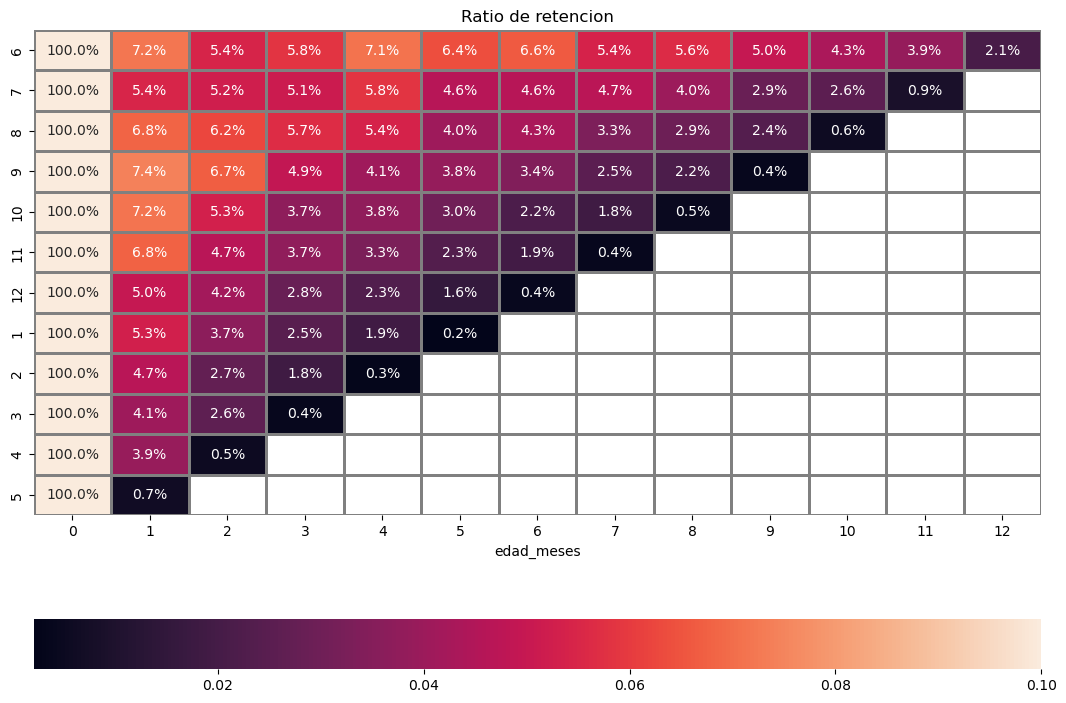

In [ ]:
plt.figure(figsize = (13, 9))
sns.heatmap(retencion, annot = True, fmt='0.1%', linewidths = 1, linecolor = 'grey', vmax = 0.1, cbar_kws = {'orientation':'horizontal'}).set(title='Ratio de retencion')
plt.show()

Promedio de retencion del primer mes siguiente

In [ ]:
print(retencion[1].mean())

0.05361100820922162


In [ ]:
# Obtener la primera visita de cada usuario
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()

In [ ]:
print(first_visit.head())

               uid            start_ts
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00


In [ ]:
# Obtener la primera compra de cada usuario
first_order = orders.groupby('uid')['buy_ts'].min().reset_index()

In [ ]:
print(first_order.head())

                uid              buy_ts
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00


In [ ]:
# Unir las tablas de primera visita y primera compra en base al 'uid'
conversion_data = pd.merge(first_visit, first_order, on='uid', how='inner')

In [ ]:
conversion_data.columns = ['uid', 'first_visit', 'first_order']

In [ ]:
print(conversion_data.head())

                uid         first_visit         first_order
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00


In [ ]:
# Calcular el tiempo que transcurre entre la primera visita y la primera compra
conversion_data['conversion_days'] = (conversion_data['first_order'] - conversion_data['first_visit']).dt.days

In [ ]:
print(conversion_data.head())

                uid         first_visit         first_order  conversion_days
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00              106
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00                0
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00                0
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00                0
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00                0


In [ ]:
# Clasificar en categorías como Conversion 0d, Conversion 1d, etc.
conversion_data['conversion_category'] = 'conversion ' + conversion_data['conversion_days'].astype(str) + 'd'

In [ ]:
print(conversion_data.head())

                uid         first_visit         first_order  conversion_days  \
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00              106   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00                0   
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00                0   
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00                0   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00                0   

  conversion_category  
0     conversion 106d  
1       conversion 0d  
2       conversion 0d  
3       conversion 0d  
4       conversion 0d  


In [ ]:
# Contar la frecuencia de cada categoría de conversión
conversion_counts = conversion_data['conversion_category'].value_counts().reset_index()

In [ ]:
conversion_counts.columns = ['conversion_category', 'count']

In [ ]:
conversion_counts.describe()

,count
count,345.000000
mean,105.863768
std,1419.681297
min,1.000000
25%,5.000000
50%,13.000000
75%,29.000000
max,26363.000000


**Observaciones** La mayoría de los usuarios toman entre 1 y 29 días para realizar la compra después de haberse registrado , ya que el 75% de los usuarios están por debajo de 29 días. 

¿Cuántos pedidos hacen durante un período de tiempo dado?

In [ ]:
# Definir el rango de fechas
fecha_inicio = '2017-06-01'
fecha_fin = '2017-06-30'

In [ ]:
# Filtrar los datos dentro del rango de fechas
pedidos_en_periodo = orders[(orders['buy_ts'] >= fecha_inicio) & (orders['buy_ts'] <= fecha_fin)]

In [ ]:
# Contar el número de pedidos en ese periodo
numero_pedidos = pedidos_en_periodo['uid'].count()

In [ ]:
print(f"Número de pedidos entre {fecha_inicio} y {fecha_fin}: {numero_pedidos}")

Número de pedidos entre 2017-06-01 y 2017-06-30: 2272


¿Cuál es el tamaño promedio de compra?

In [ ]:
# Calcular el tamaño promedio de compra
tamaño_promedio_compra = orders['revenue'].mean()

In [ ]:
print(f"El tamaño promedio de compra es: {tamaño_promedio_compra:.2f}")

El tamaño promedio de compra es: 5.00


¿Cuánto dinero traen? (LTV)

In [ ]:
# Agrupar por 'uid' y sumar los ingresos 'revenue' por cada cliente
ltv_por_cliente = orders.groupby('uid')['revenue'].sum().reset_index()

In [ ]:
# Renombrar la columna de Revenue a LTV
ltv_por_cliente = ltv_por_cliente.rename(columns={'revenue': 'LTV'})

In [ ]:
print(ltv_por_cliente.head())

                uid    LTV
0   313578113262317   0.55
1  1575281904278712   3.05
2  2429014661409475  73.33
3  2464366381792757   2.44
4  2551852515556206  10.99


In [ ]:
ltv_por_cliente.describe()

,uid,LTV
count,3.652300e+04,36523.000000
mean,9.213152e+18,6.901328
std,5.324792e+18,88.128535
min,3.135781e+14,0.000000
25%,4.615081e+18,1.470000
50%,9.245161e+18,3.050000
75%,1.383709e+19,5.800000
max,1.844617e+19,11810.180000


**Observaciones** Para calcular el LTV (Lifetime Value), que es el valor total que un cliente aporta a la empresa durante toda su relación, se suman los ingresos generados por cada cliente (es decir, todos los valores de revenue asociados a un uid).  El LTV promedio de todos los usuarios es de 6.90, lo cual significa que, en general, un usuario genera aproximadamente esta cantidad de ingresos en su ciclo de vida en la plataforma.

**Marketing**

¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [ ]:
# Dinero gastado total
gasto_total = costs['costs'].sum()

In [ ]:
print(f"Total gastado: {gasto_total}")

Total gastado: 329131.62


In [ ]:
# Dinero gastado por fuente de adquisición
gasto_por_fuente = costs.groupby('source_id')['costs'].sum()

In [ ]:
print("Gastado por fuente de adquisición:\n", gasto_por_fuente.head(10))

Gastado por fuente de adquisición:
 source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


In [ ]:
# Dinero gastado a lo largo del tiempo
gastos_tiempo = costs.groupby('dt')['costs'].sum()

In [ ]:
print("Gastado a lo largo del tiempo:\n", gastos_tiempo)

Gastado a lo largo del tiempo:
 dt
2017-06-01     735.26
2017-06-02     721.19
2017-06-03     450.85
2017-06-04     761.16
2017-06-05     821.44
               ...   
2018-05-27     532.87
2018-05-28     619.44
2018-05-29     784.79
2018-05-30    1183.00
2018-05-31    2153.70
Name: costs, Length: 364, dtype: float64


¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [ ]:
# Fusionamos visitas con orders para saber de qué fuente provienen las compras
visits_orders = pd.merge(visits, orders, on='uid', how='inner')

In [ ]:
print(visits_orders.head())

    device              end_ts  source_id            start_ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   

                    uid        date  week  month         day  \
0  16174680259334210214  2018-05-20    20      5  2018-05-20   
1  16007536194108375387  2017-09-03    35      9  2017-09-03   
2  16007536194108375387  2017-09-03    35      9  2017-09-03   
3  16007536194108375387  2017-09-03    35      9  2017-09-03   
4   8056418121947262981  2018-02-06     6      2  2018-02-06   

   session_duration  start_date              buy_ts  revenue  
0              1440  2018-05-20 2018-03-09 20:25:00     2.33  
1                60  2017-09-03 2017-09-04 12:46:00     2.44  
2                60  2017-09-03 201

In [ ]:
# Agrupamos por la fuente de anuncios y contamos el número de usuarios únicos
usuarios_por_fuente = visits_orders.groupby('source_id')['uid'].nunique()

In [ ]:
print(usuarios_por_fuente.head(10))

source_id
1      7138
2      7305
3     13846
4     14253
5     10156
7         1
9      2793
10     1773
Name: uid, dtype: int64


In [ ]:
# Costo de adquisición por cada fuente (CAC = total costs / number of customers)
cac_por_fuente = gasto_por_fuente  / usuarios_por_fuente

In [ ]:
print("Costo de adquisición de clientes por fuente:\n", cac_por_fuente)

Costo de adquisición de clientes por fuente:
 source_id
1      2.918642
2      5.859828
3     10.206676
4      4.284965
5      5.096209
7           NaN
9      1.975471
10     3.283976
dtype: float64


¿Cuán rentables eran las inversiones? (ROMI)

In [ ]:
# Ingresos por cada fuente
rentabilidad_por_fuente = visits_orders.groupby('source_id')['revenue'].sum()

In [ ]:
# Calcular el ROMI por cada fuente
romi_por_fuente = (rentabilidad_por_fuente - gasto_por_fuente ) / gasto_por_fuente

In [ ]:
print("ROMI por fuente de adquisición:\n", romi_por_fuente)

ROMI por fuente de adquisición:
 source_id
1     109.313944
2      60.631237
3       1.099381
4       7.132649
5      21.827344
7            NaN
9       5.586736
10      1.510821
dtype: float64


**Gráficos**

-Gasto total a lo largo del tiempo por fuente de anuncios

In [ ]:
gasto_por_fuente_tiempo = costs.groupby(['dt', 'source_id'])['costs'].sum().reset_index()

In [ ]:
print(gasto_por_fuente_tiempo .head())

          dt  source_id   costs
0 2017-06-01          1   75.20
1 2017-06-01          2  132.56
2 2017-06-01          3  349.38
3 2017-06-01          4   76.74
4 2017-06-01          5   73.24


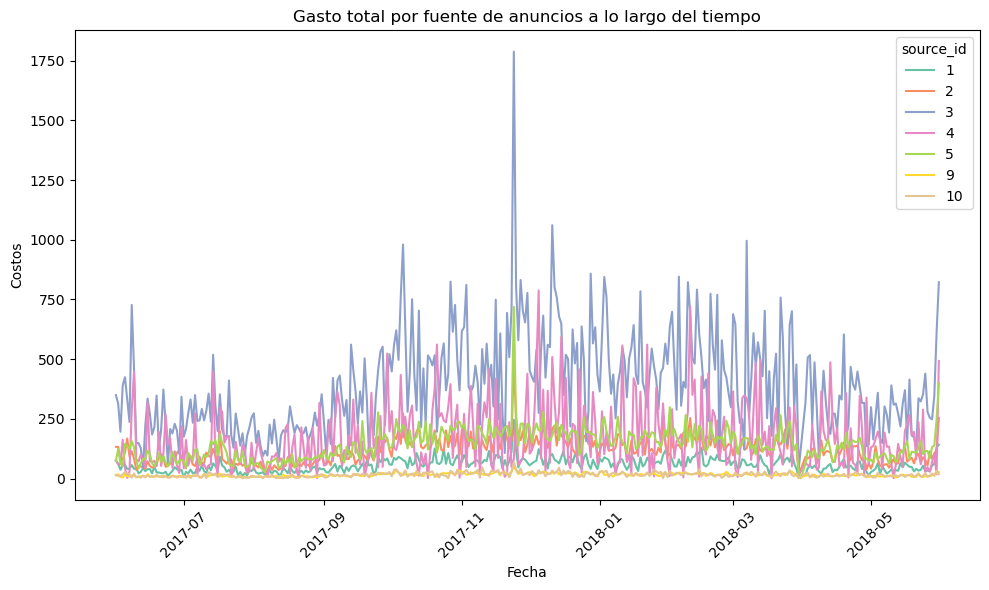

In [ ]:
palette = sns.color_palette("Set2", n_colors=gasto_por_fuente_tiempo['source_id'].nunique())

plt.figure(figsize=(10, 6))
sns.lineplot(data=gasto_por_fuente_tiempo, x='dt', y='costs', hue='source_id', palette=palette)
plt.title("Gasto total por fuente de anuncios a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Costos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-Costo de adquisición de clientes (CAC) por fuente de anuncios

In [ ]:
usuarios_por_fuente = visits_orders.groupby('source_id')['uid'].nunique().reset_index()

In [ ]:
usuarios_por_fuente.columns = ['source_id', 'num_customers']

In [ ]:
print(usuarios_por_fuente)

   source_id  num_customers
0          1           7138
1          2           7305
2          3          13846
3          4          14253
4          5          10156
5          7              1
6          9           2793
7         10           1773


In [ ]:
cac_por_fuente = pd.merge(gasto_por_fuente_tiempo.groupby('source_id')['costs'].sum().reset_index(), usuarios_por_fuente, on='source_id')

In [ ]:
print(cac_por_fuente)

   source_id      costs  num_customers
0          1   20833.27           7138
1          2   42806.04           7305
2          3  141321.63          13846
3          4   61073.60          14253
4          5   51757.10          10156
5          9    5517.49           2793
6         10    5822.49           1773


In [ ]:
cac_por_fuente['CAC'] = cac_por_fuente['costs'] / cac_por_fuente['num_customers']

In [ ]:
print(cac_por_fuente)

   source_id      costs  num_customers        CAC
0          1   20833.27           7138   2.918642
1          2   42806.04           7305   5.859828
2          3  141321.63          13846  10.206676
3          4   61073.60          14253   4.284965
4          5   51757.10          10156   5.096209
5          9    5517.49           2793   1.975471
6         10    5822.49           1773   3.283976


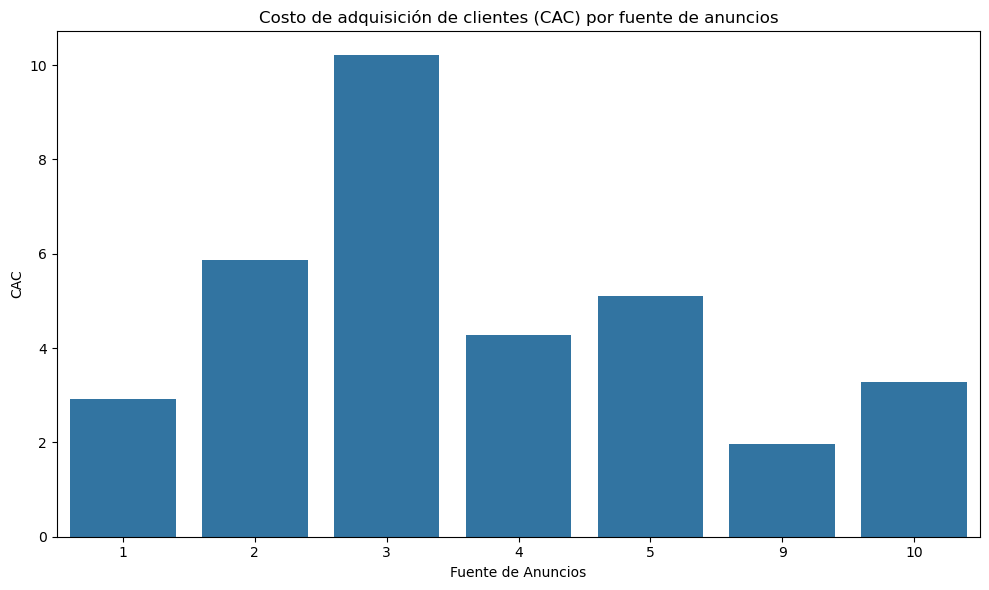

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cac_por_fuente, x='source_id', y='CAC')
plt.title("Costo de adquisición de clientes (CAC) por fuente de anuncios")
plt.xlabel("Fuente de Anuncios")
plt.ylabel("CAC")
plt.tight_layout()
plt.show()

-ROMI por fuente de anuncios

In [ ]:
romi_por_fuente = romi_por_fuente.reset_index()

In [ ]:
romi_por_fuente.columns = ['source_id', 'ROMI']

In [ ]:
print(romi_por_fuente)

   source_id        ROMI
0          1  109.313944
1          2   60.631237
2          3    1.099381
3          4    7.132649
4          5   21.827344
5          7         NaN
6          9    5.586736
7         10    1.510821


Text(0.5, 0, 'Fuente de Anuncios')

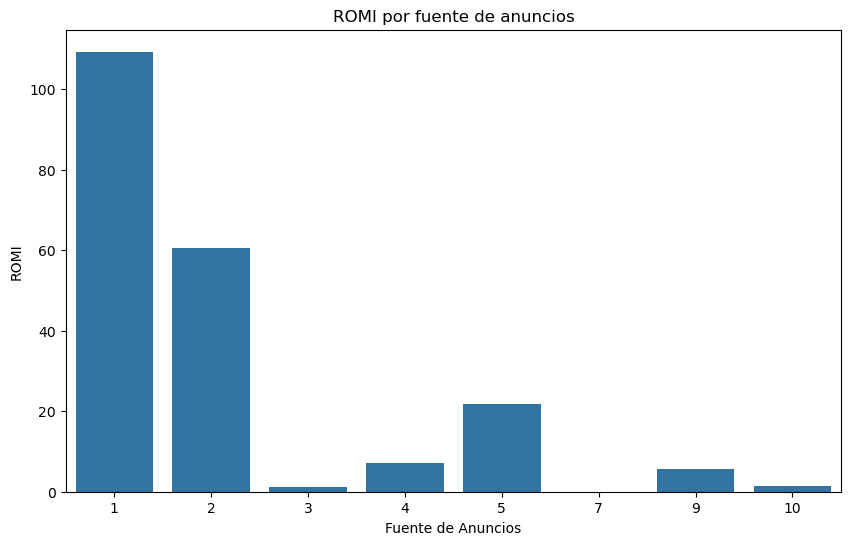

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='ROMI', data=romi_por_fuente)
plt.title("ROMI por fuente de anuncios")
plt.xlabel("Fuente de Anuncios")

-Ganancia por dispositivo 

In [ ]:
ganancia_por_dispositivo = visits_orders.groupby(['device'])['revenue'].sum().reset_index()

In [ ]:
print(ganancia_por_dispositivo)

    device     revenue
0  desktop  6447893.99
1    touch   514313.36


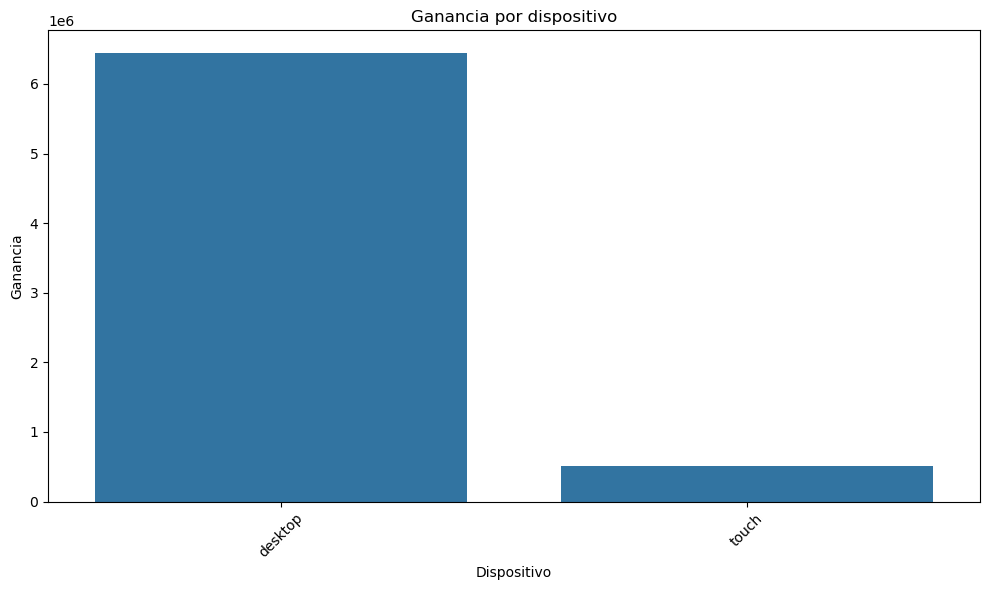

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ganancia_por_dispositivo, x='device', y='revenue')
plt.title("Ganancia por dispositivo")
plt.xlabel("Dispositivo")
plt.ylabel("Ganancia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusión y recomendaciones

* Para realizar el proyecto cargué las librerías necesarias para poder realizar los análisis solicitados.
* **Análisis Exploratorio de Datos** 
    Incorporé la base de datos y ocupé los  métodos head, info y describe para explorar la cantidad y los tipos de datos, la información de las columnas y los datos estadísticos, la detección de datos ausentes y eliminación de datos duplicados de este grupo de datos. Se uniformaron los nombres de las columnas a minúsculas, se remplazaron los espacios vacíos' ' por '_' y en el caso de las columnas que tuvieran información de fecha se cambio su tipo de dato object por date time, se examinó si habían datos duplicados y nulos los cuales no se encontraron.
* **Análisis exploratorio y cálculo de métricas**
    La fecha con el mayor número de visitas 2017-11-24 con 4042 usuarios, coincide con ser el 'Black Friday' en USA, día donde hay muchas rebajas y descuentos por lo que el número de compras se dispara lo que coincide con el aumento de número de usuarios. El comportamiento de visitas por semana y por mes son sumilares en el sentido que disminuyen a partir de oct, nov y dic del 2017 y empiezan a recuperarse en febrero del 2018.
   La mayoría de los usuarios toman entre 1 y 29 días para realizar la compra después de haberse registrado , ya que el 75% de los usuarios están por debajo de 29 días.
   La mayoría de los usuarios generan un **LTV** bajo, pero un pequeño número de usuarios contribuye significativamente, elevando el promedio. En este caso, sería útil identificar y enfocar esfuerzos en retener a esos usuarios de alto LTV, ya que representan una parte importante de los ingresos generales.
  ### Conclusión y recomendaciones para el equipo de marketing:

#### **Análisis de las fuentes de adquisición:**

- **Gasto total por fuente:**
  - La fuente 3 ha sido la que más dinero ha consumido, con un gasto total de **141,321.63**.
  - Otras fuentes importantes son la fuente 4 (**61,073.60**) y la fuente 2 (**42,806.04**).
  
- **Costo de adquisición de clientes (CAC):**
  - La fuente más costosa para adquirir clientes es la **fuente 3**, con un CAC de **10.21**, lo que sugiere que es costoso atraer clientes a través de esta plataforma.
  - La **fuente 9** y la **fuente 1** presentan los costos de adquisición más bajos, **1.98** y **2.92**, respectivamente.

- **ROMI (Retorno sobre Inversión en Marketing):**
  - La **fuente 1** es la más rentable, con un ROMI de **109.31**, lo que indica un retorno sobresaliente en comparación con las demás fuentes.
  - La **fuente 2** también presenta un buen ROMI de **60.63**, pero considerablemente menor que la fuente 1.
  - En cambio, la **fuente 3** ha tenido el menor retorno, con un ROMI de **1.10**, lo que sugiere que no es una inversión eficiente a pesar del alto gasto.
  - Otras fuentes con buen rendimiento incluyen la **fuente 5** (ROMI de **21.83**) y la **fuente 9** (ROMI de **5.59**), aunque son menos rentables que la fuente 1.

#### **Análisis de dispositivos:**
- La mayor parte de los ingresos proviene de los usuarios que utilizan **dispositivos de escritorio** (**6,447,893.99**), mientras que los usuarios de **dispositivos touch** generan significativamente menos ingresos (**514,313.36**).
- Esto sugiere que las campañas de marketing deberían enfocarse en dispositivos de escritorio, ya que son los que generan mayor rentabilidad.

#### **Recomendaciones:**

1. **Invertir en la fuente 1:**
   - La **fuente 1** tiene el mejor ROMI (**109.31**) y un bajo costo de adquisición (**2.92**). Por lo tanto, es una inversión altamente rentable, recomendando aumentar o al menos mantener la inversión en esta fuente.

2. **Reevaluar la inversión en la fuente 3:**
   - Aunque es la fuente en la que más dinero se ha gastado, su **ROMI es el más bajo** (**1.10**) y tiene el **CAC más alto** (**10.21**). Esto sugiere que la fuente no es efectiva en términos de retorno de inversión. Se recomienda reducir la inversión en la fuente 3 o reconsiderar la estrategia de marketing.

3. **Incrementar inversión en la fuente 2 y 5:**
   - La **fuente 2** tiene un **ROMI sólido** (**60.63**) y un **CAC relativamente alto** (**5.86**), pero sigue siendo una buena oportunidad para atraer más clientes. 
   - La **fuente 5** también presenta un **ROMI positivo** (**21.83**) y un CAC moderado, por lo que aumentar la inversión en estas fuentes podría traer buenos resultados.

4. **Continuar utilizando la fuente 9:**
   - A pesar de ser una fuente de menor escala (gasto de **5,517.49**), la **fuente 9** tiene el **CAC más bajo** (**1.98**) y un **ROMI positivo** (**5.59**). Esto sugiere que se podría explorar aumentar ligeramente la inversión en esta fuente.

5. **Priorizar dispositivos de escritorio:**
   - La mayor parte de los ingresos proviene de **dispositivos de escritorio**, por lo que las campañas de marketing deberían enfocarse principalmente en atraer usuarios de estos dispositivos, aunque no se debe descuidar el potencial de usuarios en dispositivos touch.

#### **Enfoque en métricas clave:**
- **ROMI**: Principal métrica utilizada para evaluar la rentabilidad de cada fuente.
- **CAC**: Evaluado para entender el costo por cada cliente nuevo y buscar eficiencia en la inversión.
- **Ingresos por dispositivo**: Para identificar qué tipo de dispositivos están generando más ingresos y ajustar las campañas en función de ello.

En resumen, se recomienda **aumentar la inversión en las fuentes más rentables (1, 2 y 5)**, **reducir el gasto en la fuente 3** y **priorizar campañas enfocadas en usuarios de escritorio**, con el fin de maximizar la rentabilidad y optimizar el gasto en marketing.
  
  
  